In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [ ]:
df = pd.read_csv('datasets/studentquiz.csv')

In [3]:
df.head()

,SNO.,ROLL NUMBER,Q1 (5),Q2 (5),Q3 (5),Q4 (5),Q5 (5),Q6 (5),Q7 (5),Q8 (5),Q9 (5),Q10 (5),Q11 (5),Q12 (5),Top 9 (out of 45),Out of 30
0,1,102003733,AB,AB,AB,AB,AB,AB,3,5,AB,AB,AB,4,12,8.0
1,2,102203002,5,AB,4,4,4,4,4,3,5,5,5,3,40,26.7
2,3,102203003,5,4,4,4,4,5,4,3,4,5,4,2,39,26.0
3,4,102203005,AB,AB,AB,AB,3,5,3,4,4,5,5,AB,29,19.3
4,5,102203007,AB,AB,AB,5,4,3,3,5,3,5,5,3,36,24.0


In [4]:
print(df.shape)
df.info()
df.describe()
df.isnull().sum()  

(1053, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SNO.               1053 non-null   int64  
 1   ROLL NUMBER        1053 non-null   int64  
 2   Q1 (5)             1053 non-null   object 
 3   Q2 (5)             1053 non-null   object 
 4   Q3 (5)             1053 non-null   object 
 5   Q4 (5)             1053 non-null   object 
 6   Q5 (5)             1053 non-null   object 
 7   Q6 (5)             1053 non-null   object 
 8   Q7 (5)             1053 non-null   object 
 9   Q8 (5)             1053 non-null   object 
 10  Q9 (5)             1053 non-null   object 
 11  Q10 (5)            1053 non-null   object 
 12  Q11 (5)            1053 non-null   object 
 13  Q12 (5)            1053 non-null   object 
 14  Top 9 (out of 45)  1053 non-null   int64  
 15  Out of 30          1053 non-null   float64
dtypes: float64(1)

SNO.                 0
ROLL NUMBER          0
Q1 (5)               0
Q2 (5)               0
Q3 (5)               0
Q4 (5)               0
Q5 (5)               0
Q6 (5)               0
Q7 (5)               0
Q8 (5)               0
Q9 (5)               0
Q10 (5)              0
Q11 (5)              0
Q12 (5)              0
Top 9 (out of 45)    0
Out of 30            0
dtype: int64

In [5]:
df_ab = [col for col in df.columns if 'Q' in col]
for col in df_ab:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df[df_ab] = df[df_ab].fillna(0)
df[df_ab].head()

,Q1 (5),Q2 (5),Q3 (5),Q4 (5),Q5 (5),Q6 (5),Q7 (5),Q8 (5),Q9 (5),Q10 (5),Q11 (5),Q12 (5)
0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,4.0
1,5.0,0.0,4.0,4.0,4.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0
2,5.0,4.0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,5.0,4.0,2.0
3,0.0,0.0,0.0,0.0,3.0,5.0,3.0,4.0,4.0,5.0,5.0,0.0
4,0.0,0.0,0.0,5.0,4.0,3.0,3.0,5.0,3.0,5.0,5.0,3.0


In [6]:
df[df_ab] = df[df_ab].fillna(0)
df.head()

,SNO.,ROLL NUMBER,Q1 (5),Q2 (5),Q3 (5),Q4 (5),Q5 (5),Q6 (5),Q7 (5),Q8 (5),Q9 (5),Q10 (5),Q11 (5),Q12 (5),Top 9 (out of 45),Out of 30
0,1,102003733,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,4.0,12,8.0
1,2,102203002,5.0,0.0,4.0,4.0,4.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,40,26.7
2,3,102203003,5.0,4.0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,5.0,4.0,2.0,39,26.0
3,4,102203005,0.0,0.0,0.0,0.0,3.0,5.0,3.0,4.0,4.0,5.0,5.0,0.0,29,19.3
4,5,102203007,0.0,0.0,0.0,5.0,4.0,3.0,3.0,5.0,3.0,5.0,5.0,3.0,36,24.0


In [7]:
df = df.drop(['SNO.','ROLL NUMBER'], axis=1)
df.head()
df.describe()
df.isnull().sum()

Q1 (5)               0
Q2 (5)               0
Q3 (5)               0
Q4 (5)               0
Q5 (5)               0
Q6 (5)               0
Q7 (5)               0
Q8 (5)               0
Q9 (5)               0
Q10 (5)              0
Q11 (5)              0
Q12 (5)              0
Top 9 (out of 45)    0
Out of 30            0
dtype: int64

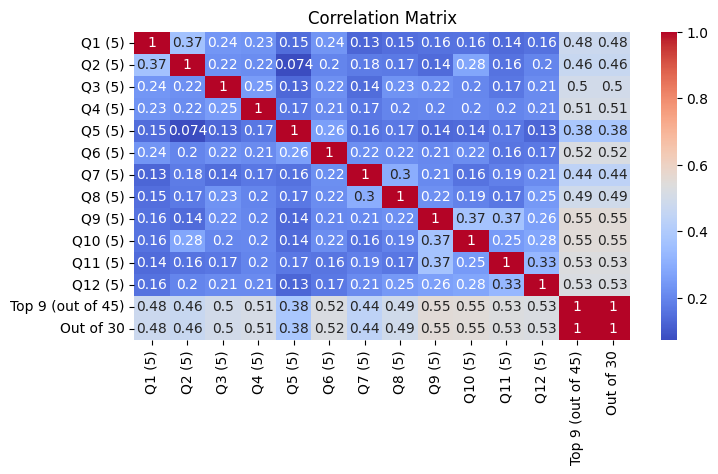

In [8]:
plt.figure(figsize=(8, 4))
sns.heatmap(df[df_ab + ['Top 9 (out of 45)', 'Out of 30']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [9]:
X = df[df_ab]
y = df["Out of 30"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.metrics import r2_score, mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred_lr = lr.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))

R² Score: 0.9043294344793373
MAE: 1.1294012207123856


In [12]:
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [13]:
y_pred_tree = tree.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred_tree))
print("MAE:", mean_absolute_error(y_test, y_pred_tree))

R² Score: 0.7790573957329976
MAE: 1.56239634762503
